# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Dataset

In [ ]:
df = pd.read_csv('/content/day(in).csv')

In [ ]:
df.shape

(731, 16)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data Cleaning & Preprocessing

In [ ]:
df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weatherSituation',
    'temp': 'temperature',
    'atemp': 'feelsLikeTemperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)


In [ ]:
df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weatherSituation', 'temperature', 'feelsLikeTemperature',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weatherSituation,temperature,feelsLikeTemperature,humidity,windspeed,casual,registered,count
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.tail()

,instant,date,season,year,month,holiday,weekday,workingday,weatherSituation,temperature,feelsLikeTemperature,humidity,windspeed,casual,registered,count
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
df.drop(['instant', 'date'], axis=1, inplace=True)

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                731 non-null    int64  
 1   year                  731 non-null    int64  
 2   month                 731 non-null    int64  
 3   holiday               731 non-null    int64  
 4   weekday               731 non-null    int64  
 5   workingday            731 non-null    int64  
 6   weatherSituation      731 non-null    int64  
 7   temperature           731 non-null    float64
 8   feelsLikeTemperature  731 non-null    float64
 9   humidity              731 non-null    float64
 10  windspeed             731 non-null    float64
 11  casual                731 non-null    int64  
 12  registered            731 non-null    int64  
 13  count                 731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [ ]:
df.describe()

,season,year,month,holiday,weekday,workingday,weatherSituation,temperature,feelsLikeTemperature,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.duplicated(keep="first").sum()

np.int64(0)

In [ ]:
print("***---Unique Values---***")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals}")

***---Unique Values---***
season: 4
year: 2
month: 12
holiday: 2
weekday: 7
workingday: 2
weatherSituation: 3
temperature: 499
feelsLikeTemperature: 690
humidity: 595
windspeed: 650
casual: 606
registered: 679
count: 696


In [ ]:
cat_col = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weatherSituation']
num_col = ['temperature', 'feelsLikeTemperature', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Visualizing Numerical Features

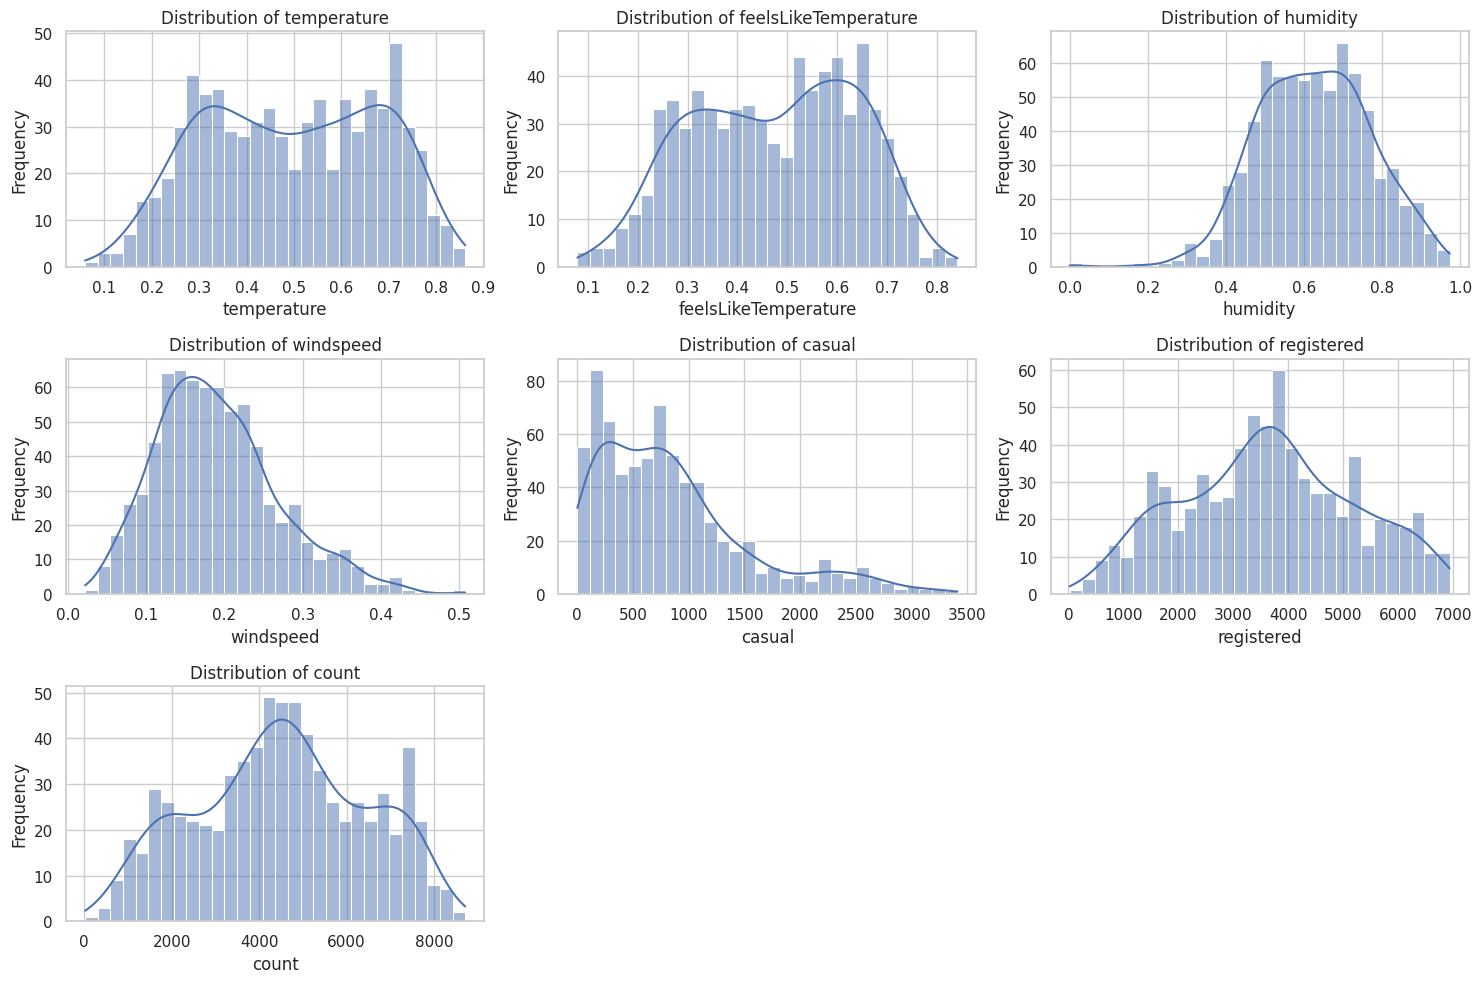

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualizing Categorical Features

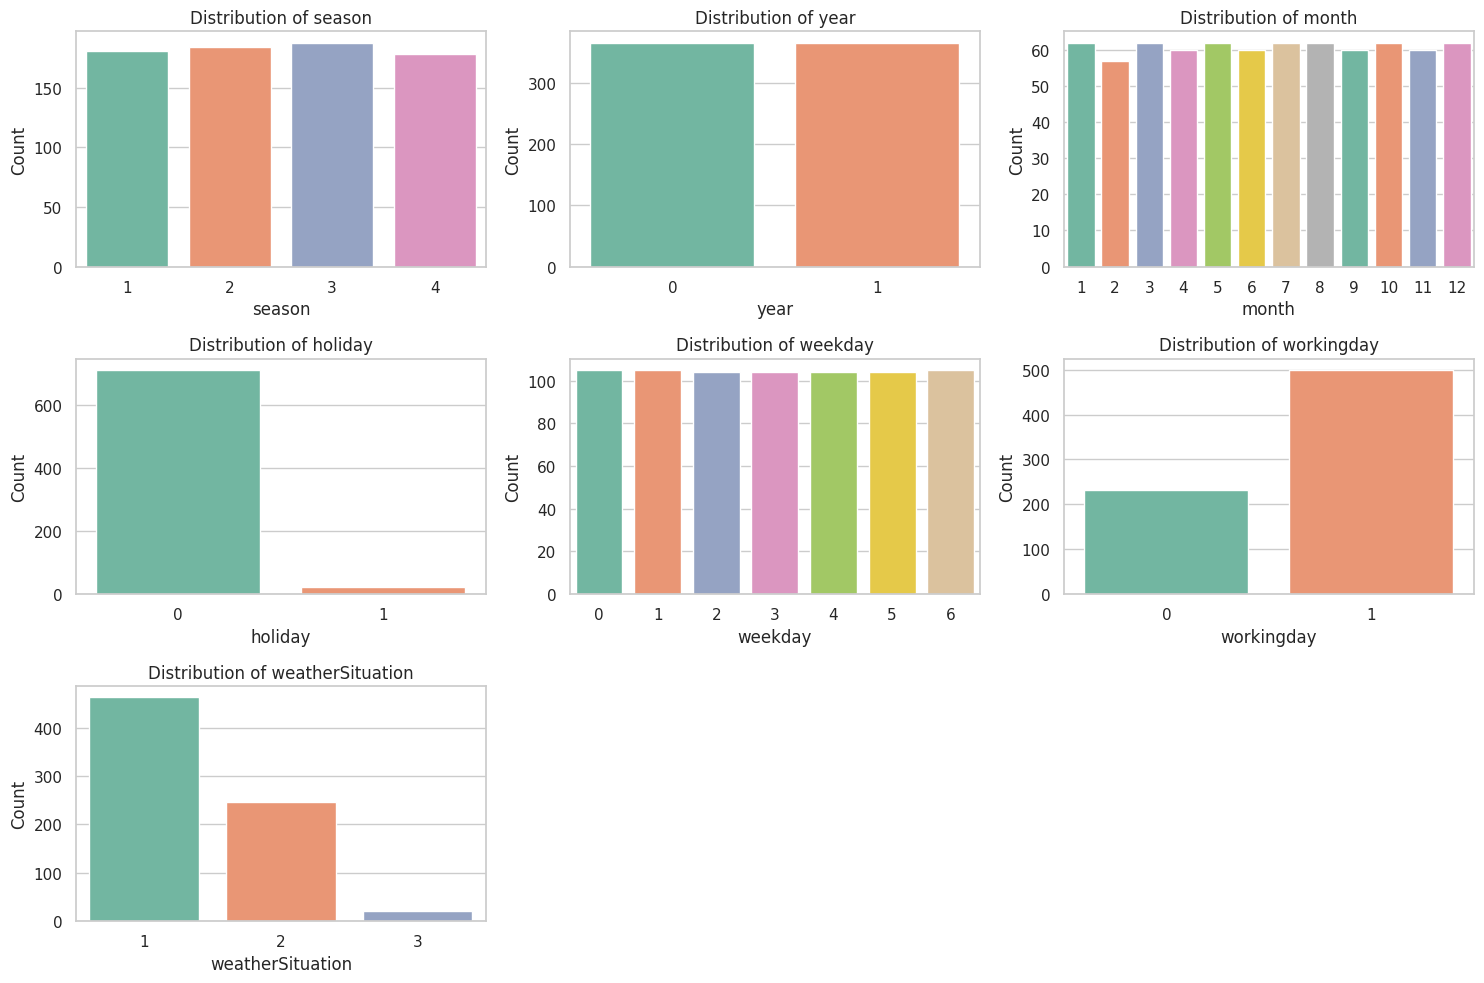

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(cat_col, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column], palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
df

,season,year,month,holiday,weekday,workingday,weatherSituation,temperature,feelsLikeTemperature,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Relationship Between Numerical Features & Count

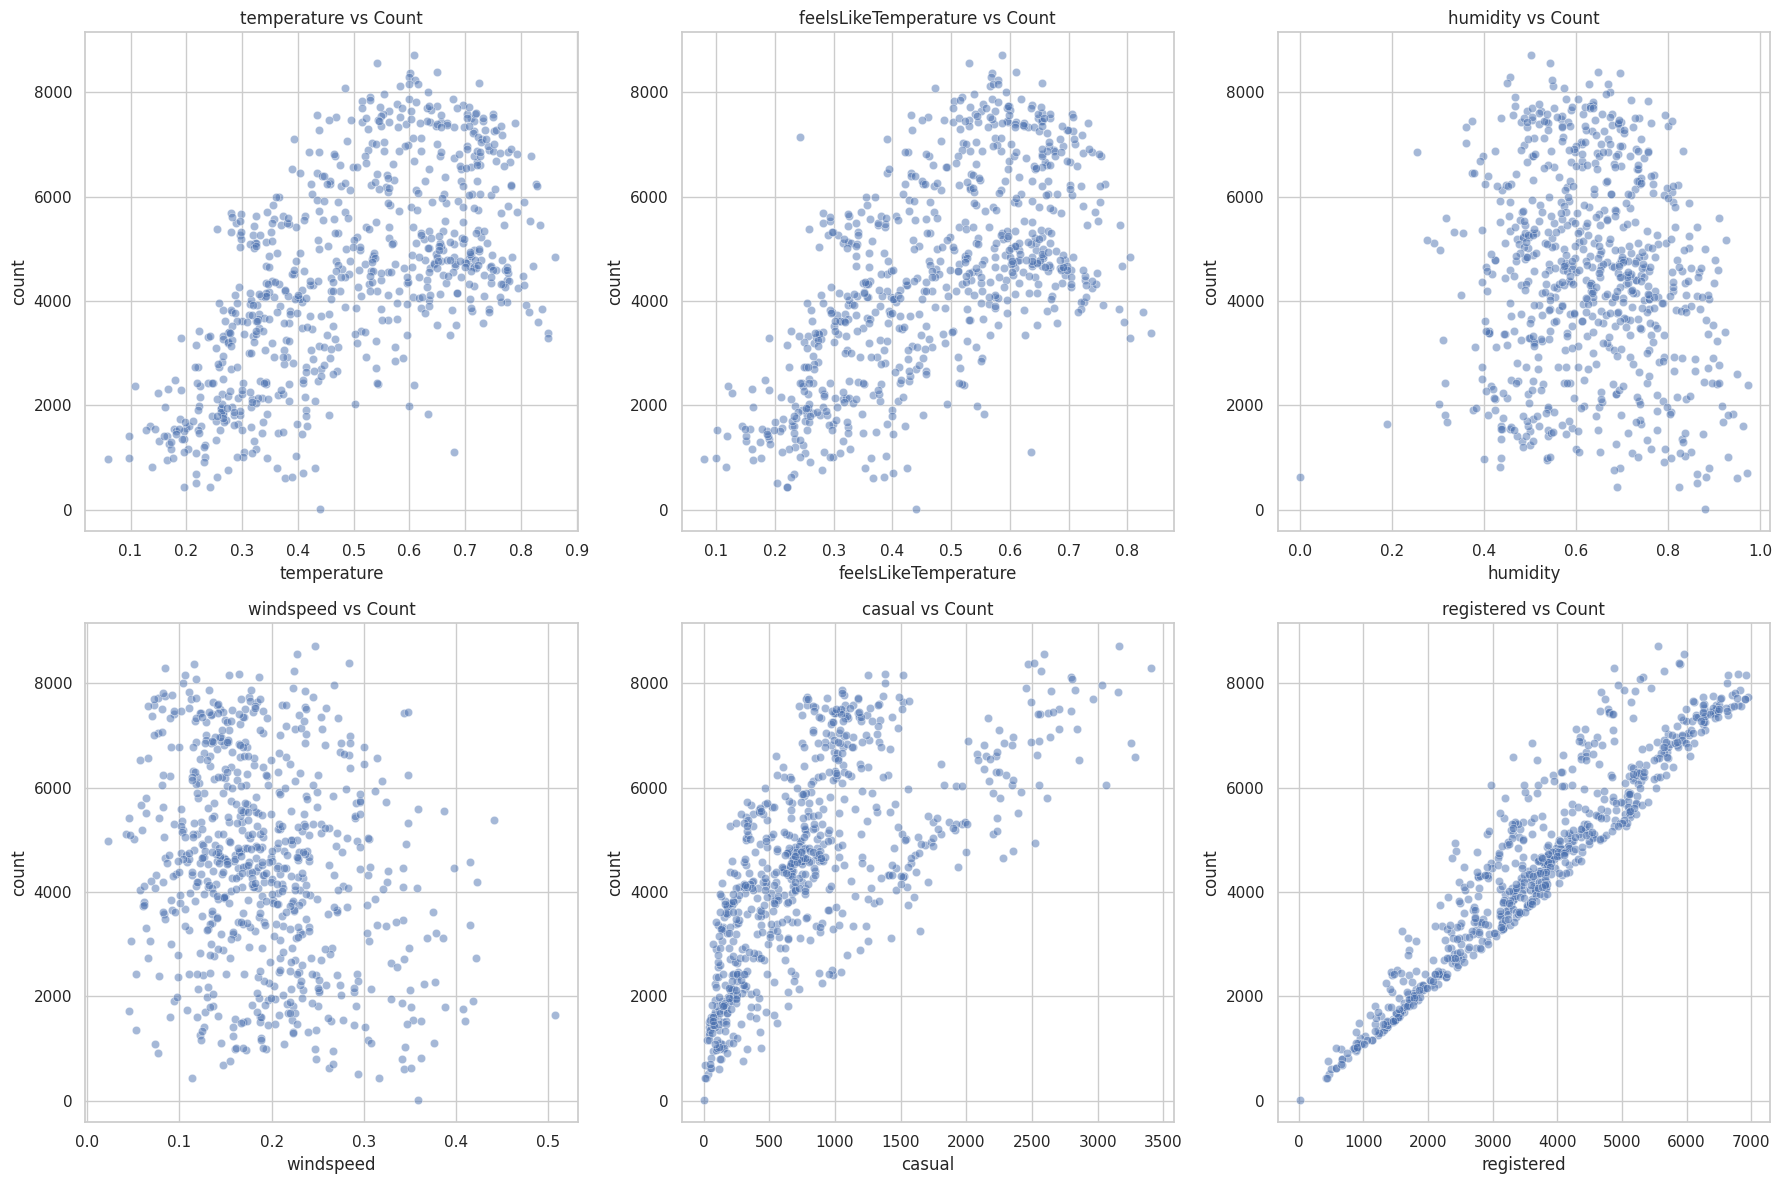

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_col):
    if col != 'count':
        plt.subplot(2, 3, i+1)
        sns.scatterplot(data=df, x=col, y='count', alpha=0.5)
        plt.title(f'{col} vs Count')
        plt.grid(True)

plt.tight_layout()
plt.show()


# Impact of Categorical Features on Count

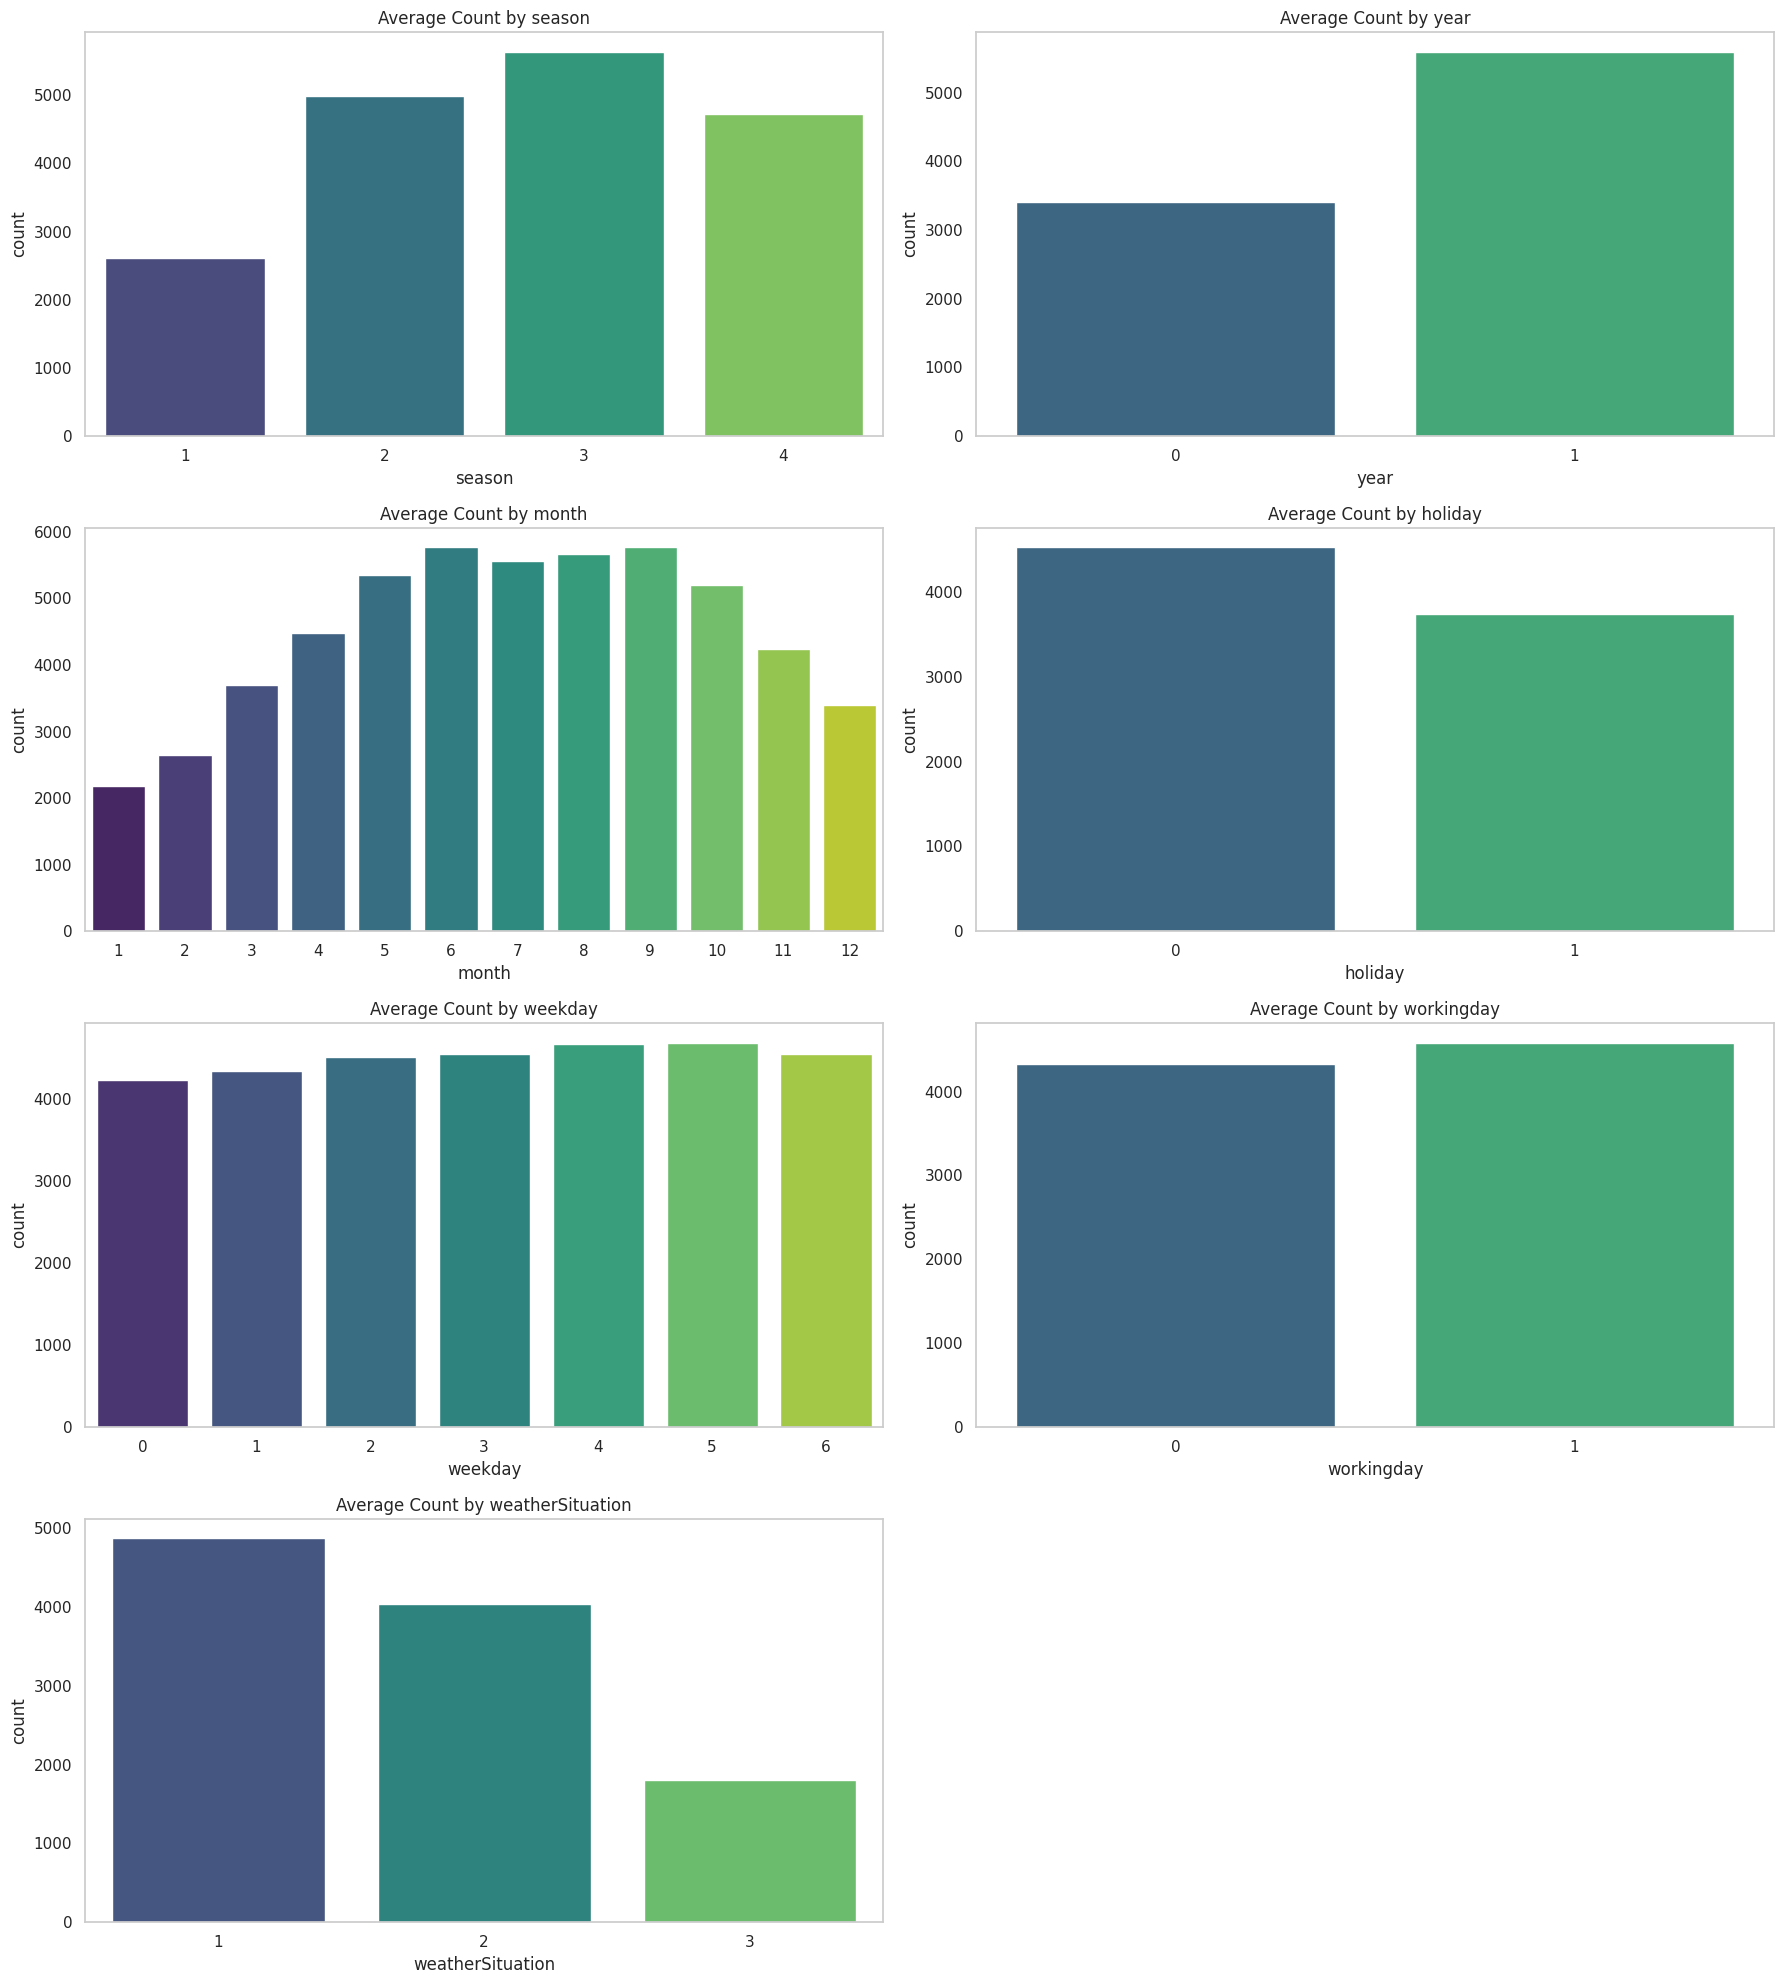

In [ ]:
plt.figure(figsize=(18, 20))

for i, col in enumerate(cat_col):
    plt.subplot(4, 2, i + 1)
    avg_count = df.groupby(col)['count'].mean().reset_index()
    sns.barplot(data=avg_count, x=col, y='count', palette='viridis')
    plt.title(f'Average Count by {col}')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Correlation Analysis

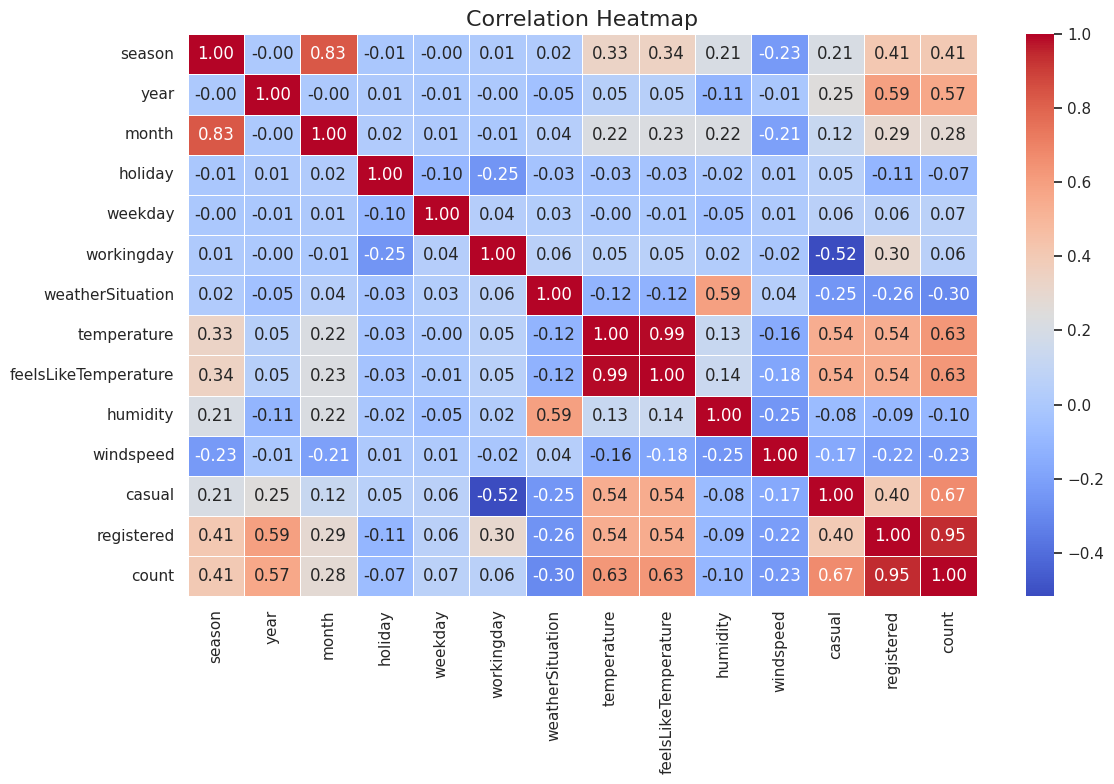

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
df = df.drop(['casual', 'registered', 'feelsLikeTemperature', 'humidity', 'windspeed'], axis=1)

In [ ]:
df['demand'] = (df['count'] > df['count'].median()).astype(int)
df.drop('count', axis=1, inplace=True)

# Train-Test Split

In [ ]:
X = df.drop('demand', axis=1)
y = df['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training and Evaluation

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.8681506849315068
Test Accuracy: 0.8503401360544217
